# Generalized Additive Model (GAM)

This page is a summarized form of [this](https://petolau.github.io/Analyzing-double-seasonal-time-series-with-GAM-in-R/) but with python implementations.


The GAM can be formally written as:

$$g(E(y_i)) = \beta_0 + f_1(x_{i1}) + \dots + f_p(x_{ip}) + \varepsilon_i,$$

$$y_i \sim \hbox{some exponential family distribution,}$$

where $ i = 1, \dots, N $, $ g $ is a link function (identical, logarithmic or inverse), $ y $ is a response variable, $ x_1, \dots, x_p $ are independent variables, $ \beta_0 $ is an intercept, $f_1, \dots, f_p $ are unknown smooth functions and $ \varepsilon $ is an i.i.d. random error.

The smooth function $ f $ is composed by sum of basis functions $ b $ and their corresponding regression coefficients $ \beta $, formally written:

$$f(x) = \sum_{i = 1}^q b_i(x)\beta_i,$$

$$\hbox{ where } q \hbox{ is basis dimension.}$$

Smooth functions are also called [splines](https://en.wikipedia.org/wiki/Spline_(mathematics)). [Smoothing splines](https://en.wikipedia.org/wiki/Smoothing_spline) are real functions that are piecewise-defined by polynomial functions (basis functions). The places, where the polynomial pieces connect are called knots. In **GAMs**, penalized regression splines are used in order to regularize the smoothness of a spline.

Therefore, the model can be written in a linear way like this:

$$g(E(y)) = \beta\mathbf{X} + \varepsilon,$$

where $ \mathbf{X} $ is a model matrix and $ \beta $ is a vector of regression coefficients.

Then, the objective function to be minimized is:

$$\parallel y - \beta\mathbf{X}\parallel^2 + \lambda\int_0^1 [f^{''}(x)]^2dx,$$

where $ \lambda $ is a smoothing parameter and the integral of squares of second derivatives can be written as:

$$\int_0^1 [f^{''}(x)]^2dx = \beta^T\mathbf{S}\beta,$$

where $ \mathbf{S} $ is matrix of known coefficients.

All this mathematical madness then implies that regression coefficients can be obtained (estimated) by the equation:

$$\hat{\beta} = (\mathbf{X}^T\mathbf{X} + \lambda\mathbf{S})^{-1}\mathbf{X}^Ty.$$

$ \hat{\beta} $ is called penalized least squares estimator in this case.
The method of obtaining the estimate of the $ \beta $ is called Penalized Iteratively Re-weighted Least Squares (P-IRLS).

There are some more important theoretical questions to answer. For example, what kind of smoothing splines exists? Or, how to choose an optimal smoothing parameter $ \lambda $? How basis dimensions (or a number of knots) are set?

There are several smoothing bases $ b $ (splines) which are suitable for regression:

* thin plate regression splines
* cubic regression spline
* cyclic cubic regression spline
* P-splines

An example of the cubic basis function for dimension $ q = 3 $:

$$\begin{equation*}
b_{cubic}(x) =
\begin{cases}
\frac{1}{4}(x+2)^3 & \text{if } -2 \leq x \leq -1,\\
\frac{1}{4}(3|x|^3-6x^2+4) & \text{if } -1 \leq x \leq 1,\\
\frac{1}{4}(2-x)^3 & \text{if } \hspace{0.48cm}  1 \leq x \leq 2.
\end{cases}
\end{equation*}$$

You can read more about them in references, which I will write up. In this post, for daily seasonality cubic regression spline, and for weekly seasonality P-splines will be used. Both types of splines are knot-based, so choosing a right number of knots will be important.

Next, an important procedure is to choose (estimate) an optimal smoothing parameter $ \lambda $ and the number of basis dimensions (i.e. degrees of freedom). This can be done in **GAM** by Generalized Cross Validation score (GCV). It minimizes an equation:

$$\nu_g = \frac{n\sum_{i=1}^n (y_i - \hat{f}_i)^2}{[tr(\mathbf{I} - \mathbf{A})]^2},$$

where $ \mathbf{A} $ is the [projection matrix](https://en.wikipedia.org/wiki/Projection_matrix) (i.e. influence or hat). It's obvious that when lambda is near 1 then spline will be over-smoothed, in opposite side when lambda is near zero than spline isn't penalized, so the method behaves like a classical OLS. With a number of basis dimensions (estimated degrees of freedom), it is opposite. Higher dimension implies that fit will be less smoothed (overfit), on the other side lower dimensions implies more smoothed behavior of fitted values.



## Interactions

We are almost at the end of the explanation of **GAMs** theory. One more thing. As I showed in the previous blog post, **interactions** are a very important part of the **regression** model for **double seasonal time series**. With **GAMs** there are four (!) main possibilities, how to include them to the model. First is the most basic, like in **MLR**, the multiplication of two independent variables: $ x_1\times x_2 $. Second one is possibility to use smoothed function to one variable: $ f_1(x_1)\times x_2 $. Third one comes to use same smoothed function for both variables: $ f_1(x_1)\times f_1(x_2) \hbox{ (often denoted } f(x_1, x_2)) $. Fourth one is the most complex, with GAM it is possible to use [tensor product](https://en.wikipedia.org/wiki/Tensor_product) interactions. So it is possible to use different smoothing bases for variables and penalize it in two (when we do interactions of two independent variables) different ways: $ f_1(x_1)\otimes f_2(x_2)  $. More nicely, tensor product interactions can be written as:

$$f_{12}(x_1, x_2) = \sum_{i=1}^I \sum_{j=1}^J \delta_{ij}b_{1i}(x_1)b_{2j}(x_2),$$

where $ b_1 $ and $ b_2 $ are basis functions, $ I $ and $ J $ are corresponding basis dimensions and $ \delta $ is vector of unknown coefficients.

This allows for an overall [anisotropic](https://en.wikipedia.org/wiki/Anisotropy) (different in each direction) penalty, so the overall shape of a tensor product smooth is invariant to a rescaling of its independent variables. This is a huge advantage in the comparison to usage of one smoothing function. Simply said, we have theoretically supported that it's allowed to use different metrics of variables in the interactions term.

## Resources (references)

Phew...that's almost all of the difficult theory behind **GAM** method. I will add some more things in analytical part of this post. Honestly, it was difficult for me to find this information on the web. So if you want to read more about **GAM**, here is the list of useful links which were used in my post:

* Amazing book: Simon N. Wood: [Generalized Additive Models: an introduction with R](https://www.crcpress.com/Generalized-Additive-Models-An-Introduction-with-R/Wood/p/book/9781584884743), CRC Press, 2006.
* Great blog post by Gavin Simpson: [Modelling seasonal data with GAMs](http://www.fromthebottomoftheheap.net/2014/05/09/modelling-seasonal-data-with-gam/)
* Very helpful StackExchange (Cross Validated) [question about the intuition behind tensor product interactions](http://stats.stackexchange.com/questions/45446/intuition-behind-tensor-product-interactions-in-gams-mgcv-package-in-r)
* This [tutorial about mixed GAMs](http://www.sfs.uni-tuebingen.de/~jvanrij/Tutorial/GAMM.html) can be helpful too.

Go ahead to modeling and analyzing time series with **GAMs**.

### Doing "magic" with GAMs for modeling time series

I have prepared a file with four aggregated time series of electricity consumption for an analysis. It can be found on [my GitHub repo](https://github.com/PetoLau/petolau.github.io/tree/master/_rmd), the name of the file is *DT_4_ind*. The file was created easily by the package `feather` ([CRAN link](https://CRAN.R-project.org/package=feather)). Data manipulations will be done then by `data.table` package.

GAM methods are implemented in **R** in the awesome package `mgcv` by Simon Wood ([link to `mgcv`](https://CRAN.R-project.org/package=mgcv)).


Read in data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

DT = pd.read_csv('_static//DT_load_17weeks_weather.csv', sep=';')
DT.head()

,value,date_time,date,week_num,weekday,temperature,humidity,pressure
0,1904.3162,2016-05-02T00:00:00Z,2016-05-02,1,Monday,14,54,1018
1,1869.7434,2016-05-02T00:30:00Z,2016-05-02,1,Monday,14,63,1017
2,1866.1062,2016-05-02T01:00:00Z,2016-05-02,1,Monday,14,52,1017
3,1845.9948,2016-05-02T01:30:00Z,2016-05-02,1,Monday,14,63,1017
4,1853.3689,2016-05-02T02:00:00Z,2016-05-02,1,Monday,13,56,1017


Transform the characters of weekdays to integers

In [7]:
# Preprocess

DT['date_time'] = pd.to_datetime(DT['date_time'])
DT['weekday'] = DT['date_time'].dt.dayofweek

DT.head()

,value,date_time,date,week_num,weekday,temperature,humidity,pressure
0,1904.3162,2016-05-02 00:00:00+00:00,2016-05-02,1,0,14,54,1018
1,1869.7434,2016-05-02 00:30:00+00:00,2016-05-02,1,0,14,63,1017
2,1866.1062,2016-05-02 01:00:00+00:00,2016-05-02,1,0,14,52,1017
3,1845.9948,2016-05-02 01:30:00+00:00,2016-05-02,1,0,14,63,1017
4,1853.3689,2016-05-02 02:00:00+00:00,2016-05-02,1,0,13,56,1017


Store informations in variables of the type of industry, date, weekday and period for simpler working.


In [8]:
n_date = np.unique(DT['date'])
n_weekdays = np.unique(DT['week_num'])

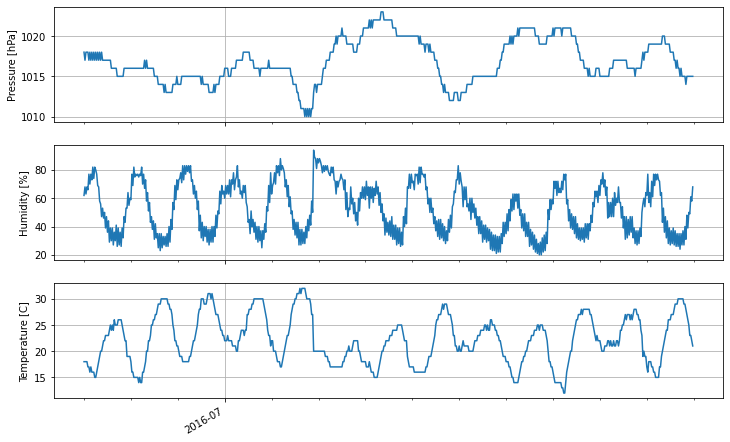

In [19]:
data_r = DT[DT['date'].isin(n_date[57:70])]

fig, axs = plt.subplots(3, 1, sharex=True, figsize=(12, 8))
axs[2].plot(data_r['date_time'], data_r['temperature'])
axs[1].plot(data_r['date_time'], data_r['humidity'])
axs[0].plot(data_r['date_time'], data_r['pressure'])

def config_date_plot(ax):
    fmt_half_year = mdates.MonthLocator(interval=1)
    ax.xaxis.set_major_locator(fmt_half_year)
    fmt_month = mdates.DayLocator()
    ax.xaxis.set_minor_locator(fmt_month)
    # Text in the x axis will be displayed in 'YYYY-mm' format.
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Format the coords message box, i.e. the numbers displayed as the cursor moves
    # across the axes within the interactive GUI.
    ax.format_xdata = mdates.DateFormatter('%Y-%m')
    return ax

axs[2] = config_date_plot(axs[2])
axs[0].grid(True)
axs[1].grid(True)
axs[2].grid(True)

axs[0].set_ylabel('Pressure [hPa]')
axs[1].set_ylabel('Humidity [%]')
axs[2].set_ylabel('Temperature [C]')

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()


In [20]:
!pip install pyGAM